In [1]:
import sys
sys.path.insert(1, ".")

from tasks.graph import graph_utils
import numpy as np
import pandas as pd
from tqdm import tqdm
from utils import llm_api
import matplotlib.pyplot as plt

In [47]:
for n, m in graph_size:
    print((2 * m) / n)

5.0
13.333333333333334
15.0
16.0
20.0


In [25]:
graph_size = [
    (20, 50),
    (30, 200),
    (40, 300),
    (50, 400),
    (50, 500)
]

samples = 10

results = {
    "edge_size": [],
    "vertex": [],
    "error": []
}

for node_size, edge_size in tqdm(graph_size):
    # node_size = (2 * edge_size) // 10
    # print(edge_size, node_size)
    for vertex in [0, node_size // 2, node_size - 1]:
        for _ in range(samples):
            edges = graph_utils.generate_graph(node_size, edge_size)

            prompt = "Consider a graph with the following edges:\n"
            for edge in edges:
                prompt += f"{edge}\n"
            prompts = [prompt, f"What is the degree of node {vertex}? Answer with a number with no furthur exaplanations."]

            response = llm_api.ask(questions=prompts, model="gpt-3.5-turbo")
            response = llm_api.take_out_number(response)

            error = abs(response - graph_utils.get_degree(edges, vertex))

            results["edge_size"].append(edge_size)
            results["vertex"].append(vertex)
            results["error"].append(error)
results = pd.DataFrame(results)

100%|██████████| 5/5 [00:58<00:00, 11.66s/it]


In [4]:
# results.to_csv("./data/initial_results_intro.csv", index=0)
results = pd.read_csv("./data/initial_results_intro.csv")

In [9]:
data = results.groupby("edge_size").mean().reset_index()[["edge_size", "error"]]

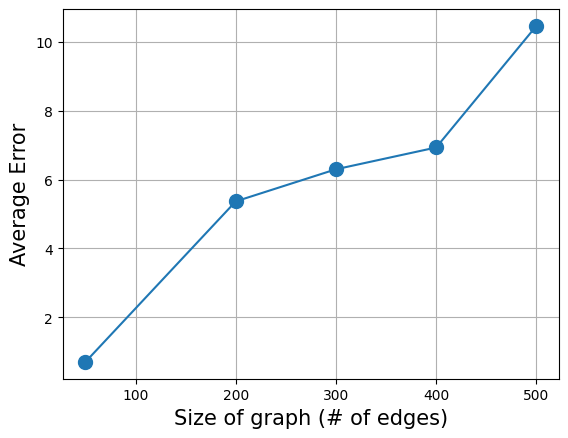

In [5]:
df = results.groupby("edge_size").mean().reset_index()
plt.plot(
    df["edge_size"],
    df["error"],
    marker="o",
    markersize=10
)
plt.xlabel("Size of graph (# of edges)", fontsize=15)
plt.ylabel("Average Error", fontsize=15)
plt.grid()
# plt.savefig("initial_error.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


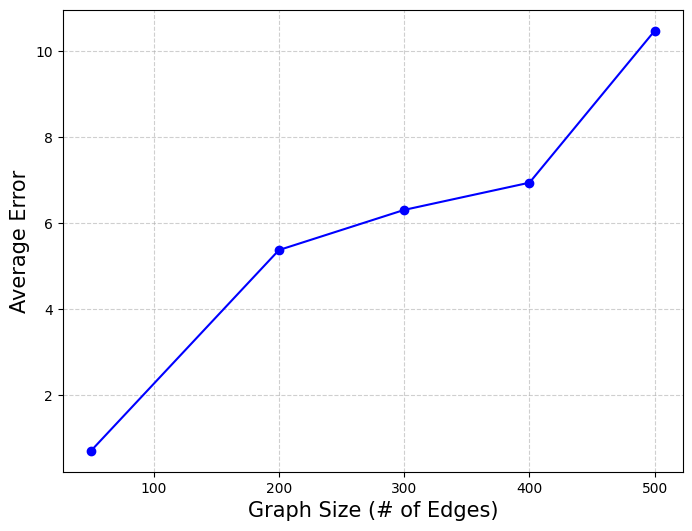

In [17]:
df = data

# Plotting the trend of error with respect to edge size
plt.figure(figsize=(8, 6))

# Line plot showing the trend
plt.plot(df['edge_size'], df['error'], marker='o', linestyle='-', color='b')

# Customizing the plot appearance
plt.xlabel('Graph Size (# of Edges)', fontsize=15)
plt.ylabel('Average Error', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the legend
# plt.legend()

# Show the plot
# plt.savefig("initial_error.eps", format="eps")
plt.show()